In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import gmaps
from sklearn.linear_model import LinearRegression 
from datetime import datetime as dt
import time

In [2]:
# Output File (CSV)
# Read the accident data 
accident=pd.read_csv("CA_Accidents_Dec19.csv")
accident

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
2,730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663199,2974330,A-2974354,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,...,False,False,False,False,False,False,Day,Day,Day,Day
663200,2974331,A-2974355,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,...,False,False,False,False,False,False,Day,Day,Day,Day
663201,2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,...,False,False,False,False,False,False,Day,Day,Day,Day
663202,2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
#read the columns of the dataframe
accident.columns.tolist()

['Unnamed: 0',
 'ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [4]:
#pick out specific columns
time_accident_df = accident[["ID","Severity", "Start_Time", "Start_Lat", "Start_Lng", "Street",
                           "City", "County", "State", "Zipcode", "Temperature(F)", 
                           "Weather_Condition"]]
time_accident_df 

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,A-729,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,A-730,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,A-731,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,A-732,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,A-733,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
663199,A-2974354,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair
663200,A-2974355,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair
663201,A-2974356,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy
663202,A-2974357,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair


In [5]:
#pick out the time columns 
time_accident_df['Start_Time']

0         2016-06-21 10:34:40
1         2016-06-21 10:30:16
2         2016-06-21 10:49:14
3         2016-06-21 10:41:42
4         2016-06-21 10:16:26
                 ...         
663199    2019-08-23 18:03:25
663200    2019-08-23 19:11:30
663201    2019-08-23 19:00:21
663202    2019-08-23 19:00:21
663203    2019-08-23 18:52:06
Name: Start_Time, Length: 663204, dtype: object

In [6]:
#add a "hour" column to the DataFrame
time_accident_df['hour']=pd.to_datetime(time_accident_df['Start_Time']).dt.hour
#preview the DF
time_accident_df
# for hour in time_accident_df['hour']:
#     Hour_AMPM = dt.strptime(str(hour), "%H").strftime("%I %p")
# Hour_AMPM 

# time_accident_df[dt.strptime(str(time_accident_df['hour']), "%H").strftime("%I %p")]
# time_accident_df['Hour_AMPM']=
# time_accident_df


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition,hour
0,A-729,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear,10
1,A-730,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear,10
2,A-731,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear,10
3,A-732,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear,10
4,A-733,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663199,A-2974354,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair,18
663200,A-2974355,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair,19
663201,A-2974356,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy,19
663202,A-2974357,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair,19


In [7]:
# #I want to change the time to AM and PM
# time_accident_df['hour']
# Hour=[]
# hour_list=time_accident_df['hour']
# # for hour in hour_list:
#     hour_12=
#     Hour.append(hour_12)
    
# time_accident_df['Hour']=Hour

In [8]:
#pick out the hour columns
hour=time_accident_df['hour']
#did a value count to check the most frequent hour 
hour_count=hour.value_counts()

hour_count
#covert the series into Dataframe
hour_df=hour.value_counts().rename_axis('Hour').reset_index(name='Counts of Accidents')
hour_df

hour_reindex=hour_count.sort_index(ascending=True)
hour_reindex

0     11721
1      9238
2      9916
3      9088
4     12933
5     21200
6     30575
7     38816
8     40330
9     35910
10    32306
11    34155
12    32322
13    33933
14    37917
15    43557
16    44469
17    48581
18    40485
19    29056
20    22537
21    17118
22    14613
23    12428
Name: hour, dtype: int64

In [9]:
hour_df.sort_values(by=['Hour'])

,Hour,Counts of Accidents
20,0,11721
22,1,9238
21,2,9916
23,3,9088
18,4,12933
15,5,21200
12,6,30575
5,7,38816
4,8,40330
7,9,35910


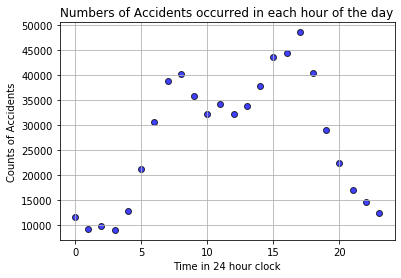

In [10]:
fig, ax = plt.subplots()
plt.scatter(hour_df['Hour'],hour_df["Counts of Accidents"],marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75 )   
plt.xlabel("Time in 24 hour clock")
plt.ylabel("Counts of Accidents")
plt.title("Numbers of Accidents occurred in each hour of the day")
plt.grid()
# (slope, intercept, _, _, _) = linregress(hour_df['Hour'],hour_df["Counts of Accidents"])
# fit=slope*hour_df['Hour']+intercept
# ax.plot(hour_df['Hour'],fit,'r--')
# print(f'The r-squard is: {slope}')
# # line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# # plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
# # print(line_eq)
# # plt.show()

#I want to show how peak time have more accidents, should I use liner regression or not. 


Text(0.5, 1.0, 'Numbers of Accidents occurred in each hour of the day)')

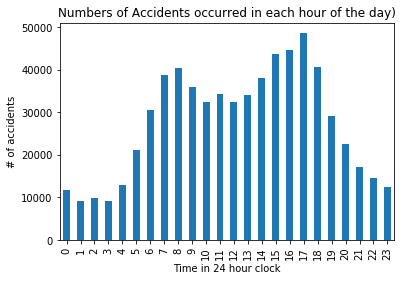

In [11]:
hour_reindex.plot(kind="bar")
plt.xlabel("Time in 24 hour clock")
plt.ylabel("# of accidents")
plt.title("Numbers of Accidents occurred in each hour of the day)")

In [12]:
hour_AM=hour_df[hour_df['Hour']<12]
hour_AM_set=hour_AM.sort_values(by=['Hour']).reset_index(drop=True)


In [13]:
hour_AM_set

,Hour,Counts of Accidents
0,0,11721
1,1,9238
2,2,9916
3,3,9088
4,4,12933
5,5,21200
6,6,30575
7,7,38816
8,8,40330
9,9,35910


Text(0.5, 1.0, 'Numbers of Accidents occurred in each hour of the day)')

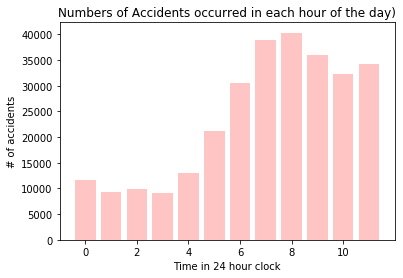

In [22]:
x_axis = np.arange(len(hour_AM_set['Hour']))
plt.bar(hour_AM_set['Hour'],hour_AM_set['Counts of Accidents'], color='r', alpha=0.23, align="center")

plt.xlabel("Time in 24 hour clock")
plt.ylabel("# of accidents")
plt.title("Numbers of Accidents occurred in each hour of the day)")

In [32]:
# X=hour_AM_set.iloc[:,'Hour':'Counts of Accidents'].values
# y=hour_AM_set.iloc[:'Counts of Accidents'].values
# lin = LinearRegression() 
# lin.fit(X, y) 

In [15]:
hour_PM=hour_df[hour_df['Hour']>11]
hour_PM_set=hour_PM.sort_values(by=['Hour']).reset_index(drop=True)


In [16]:
hour_PM_set

,Hour,Counts of Accidents
0,12,32322
1,13,33933
2,14,37917
3,15,43557
4,16,44469
5,17,48581
6,18,40485
7,19,29056
8,20,22537
9,21,17118


Text(0, 0.5, '# of accidents')

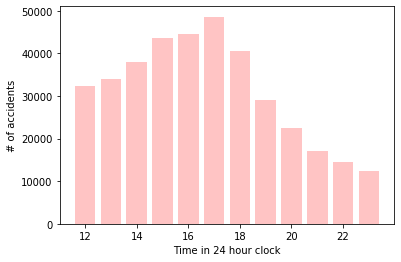

In [33]:

# x_axis = np.arange(min(hour_PM_set['Hour']), max(hour_PM_set['Hour'])+1, 1)
plt.bar(hour_PM_set['Hour'],hour_PM_set['Counts of Accidents'], color='r', alpha=0.23, align="center")
plt.xlabel("Time in 24 hour clock")
plt.ylabel("# of accidents")
#plt.title("Numbers of Accidents occurred in each hour of the day)")


In [18]:
weather=accident['Weather_Condition']
weather_count=weather.value_counts()
weather_10=weather_count.head(10)
weather_10

Clear               253070
Fair                103016
Mostly Cloudy        60440
Partly Cloudy        59555
Overcast             58472
Scattered Clouds     29356
Cloudy               24959
Haze                 21830
Light Rain           20437
Rain                  6438
Name: Weather_Condition, dtype: int64

Text(0.5, 1.0, 'Numbers of Accidents occurred in the kind of weather')

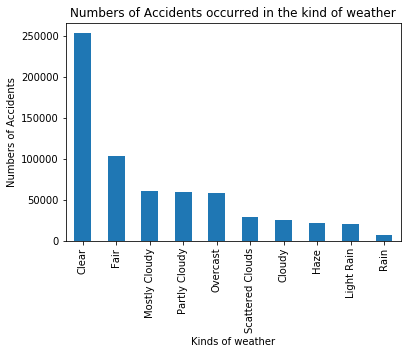

In [19]:
weather_10.plot(kind="bar")
plt.xlabel("Kinds of weather")
plt.ylabel("Numbers of Accidents")
plt.title("Numbers of Accidents occurred in the kind of weather")
